In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman2
X, y = make_friedman2(n_samples = 200, random_state=42, noise=0.5)
print(X.shape)
print(y.shape)

(200, 4)
(200,)


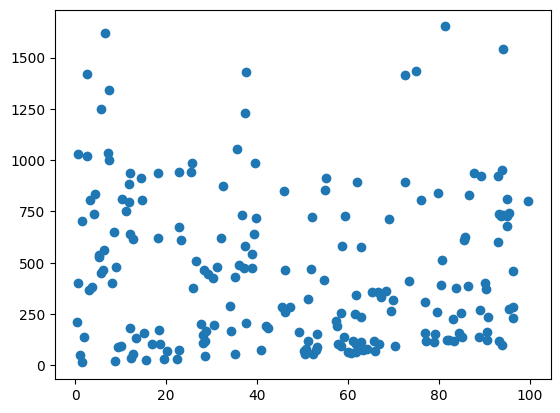

In [4]:
plt.scatter(X[:,0],y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [33]:
scaler = StandardScaler()

print(y_train.shape)
y_tmp = y_train.reshape(-1, 1)
y_train = scaler.fit_transform(y_tmp)
print(y_train.shape)

y_tmp = y_test.reshape(-1, 1)
y_test = scaler.transform(y_tmp)
print(y_test.shape)

(160,)
(160, 1)
(40, 1)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [34]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [25]:
class MLP(nn.Module):
    # define nn
    def __init__(self, input_dim=4, output_dim=3, hidden_dim = [128,64]):
        super(MLP, self).__init__()
        self.input = nn.Linear(input_dim, hidden_dim[0])
        self.hidden = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.out = nn.Linear(hidden_dim[1], output_dim)
        self.relu = nn.ReLU()

    def forward(self, X):
        X = self.relu(self.input(X))
        X = self.relu(self.hidden(X))
        X = self.out(X)
        return X

In [26]:
input_dim = 4
output_dim = 1
hidden_dim = [64, 64]
model = MLP(input_dim=input_dim, output_dim=output_dim, hidden_dim=hidden_dim)

In [27]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [28]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()
        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [35]:
import numpy as np
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0027, Test Loss: 0.0044
Epoch 100/1000, Train Loss: 0.0007, Test Loss: 0.0018
Epoch 150/1000, Train Loss: 0.0004, Test Loss: 0.0016
Epoch 200/1000, Train Loss: 0.0002, Test Loss: 0.0015
Epoch 250/1000, Train Loss: 0.0001, Test Loss: 0.0015
Epoch 300/1000, Train Loss: 0.0001, Test Loss: 0.0016
Epoch 350/1000, Train Loss: 0.0001, Test Loss: 0.0015
Epoch 400/1000, Train Loss: 0.0001, Test Loss: 0.0015
Epoch 450/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 700/1000, Train Loss: 0.0001, Test Loss: 0.0015
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.0015
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.0014
Epoch 850/1000, Train Loss: 0.0001, Test Loss: 0.0016
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.0014
Epoch 950/1000, Train Loss: 0

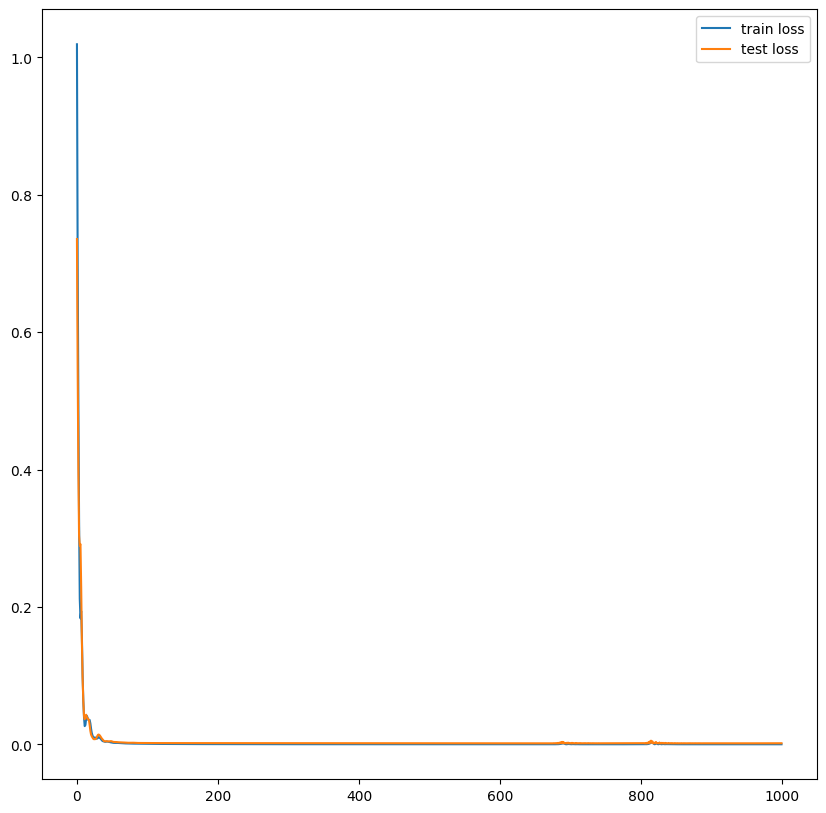

In [36]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [37]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

print(predictions_train.shape)
print(type(predictions_train))

print(y_train.shape)
print(type(y_train))

torch.Size([160, 1])
<class 'torch.Tensor'>
torch.Size([160, 1])
<class 'torch.Tensor'>


In [41]:
yt = y_test.numpy()
print(type(yt))
print(yt.shape)

yh = predictions_test.numpy()
print(type(yh))
print(yh.shape)


<class 'numpy.ndarray'>
(40, 1)
<class 'numpy.ndarray'>
(40, 1)


In [42]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse

print('mse is: ', mse(yt, yh))
print('rmse is: ', rmse(yt, yh))

mse is:  0.001506095
rmse is:  0.03880844


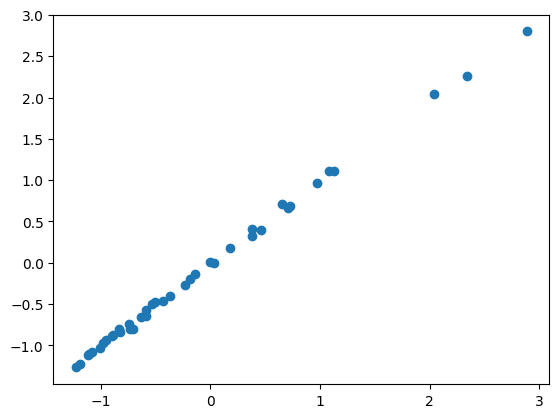

In [43]:
plt.scatter(yt,yh)

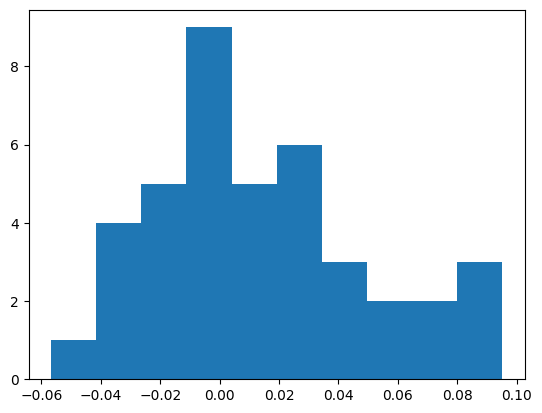

<Axes: ylabel='Density'>

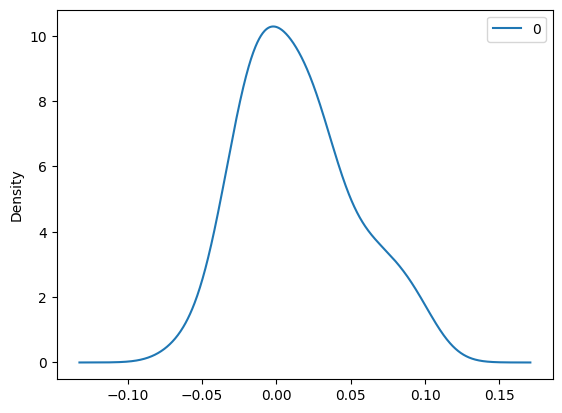

In [49]:
residuals = yt-yh
plt.hist(residuals)
plt.show()

import pandas as pd
pd.DataFrame(residuals).plot(kind='density')
